>> #   **PRCP-1000-PortugeseBank**

##  Problem Statement

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.

## Objective
- The Objective is to predict whether a customer will subscribe to term deposit(y)

## Task -1 Complete Data Analysis Reprot

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,StratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

### 2.Data Collection and Analysis

#### 2.1. Data collect

In [2]:
df = pd.read_csv(r"C:\Users\DELL 5410\Downloads\PRCP-1000-ProtugeseBank\Data\bank-additional\bank-additional-full.csv",sep=';')

#### 2.2. Understand Data

In [3]:
print(df.shape)

(41188, 21)


In [4]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


#### 2.3 Identifing Numeric and Categoric columns

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Insights
- The dataset contains 41188 observations and 21 features.
- The dataset includes demographic information, financial and loan-related attributes, campaign interaction history, and macroeconomic indicators that influence customer investment behavior.  

#### 2.4 Check duplicate and null values

In [6]:
# check null values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
#check duplicate values
print(df.duplicated().sum())

12


#### Insights 
- Dataset contain duplicate values, so we will drop them.
- Dataset does not cantain any missing values.
- However several categorical varibles include 'unknown', which is treated as valid category.

In [8]:
df.drop_duplicates(inplace=True)

#### 2.5. Target Variable Analysis

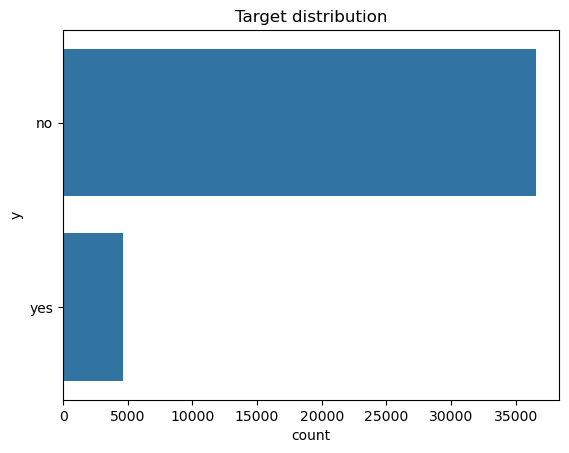

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

In [9]:
sns.countplot(df['y'])
plt.title('Target distribution')
plt.savefig("visulaization/target_variable_analysis.png")
plt.show()
df['y'].value_counts(normalize=True)

#### Insights
- Dataset is highly imbalanced
- ~89% no and ~11% yes

## 3. Exploaratory Data Analysis

### 3.1 Bank client data analysis

#### 3.1.1 Age vs Subscription

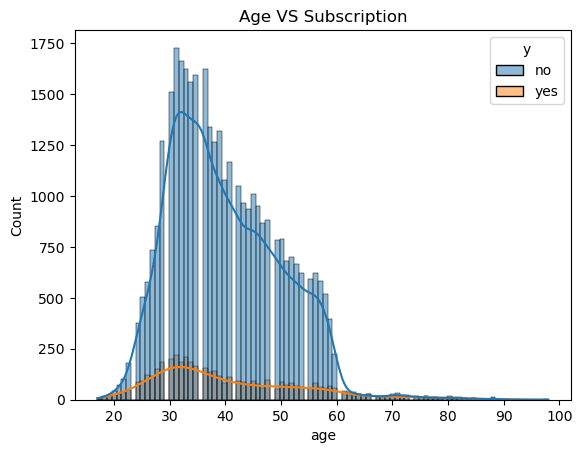

In [10]:
sns.histplot(x=df.age,hue=df.y, kde=True)
plt.title('Age VS Subscription')
plt.savefig("visulaization/age_vs_subsctiption.png")
plt.show()

##### Insights 
- The 30-40 age group shows more subscription rate compared to other age groups.
- Younger age group who are below age 25 shows lower subscription rate, possible reason could be lower income, less financial commitments.
- Older age group who are above age 60 also shows lower subsciription rate, This may due to retiremnt and less need for long-term financial needs.
##### Business Insights
- The 30-40 age group represent high potential target segment for marketing compaigns.
- Targeted offer and personalized messaging could imporve conversion rate in this segment

#### 3.1.2 Job vs Subscription

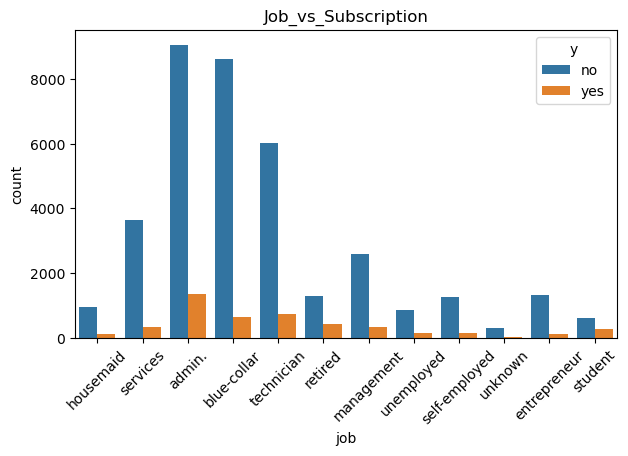

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x=df.job,hue=df.y)
plt.xticks(rotation=45)
plt.title('Job_vs_Subscription')
plt.savefig("visulaization/job_vs_subscription.png")
plt.show()

#### Insghts
- People who are in the job **admin, blue-collar, technician** have higher subscription rate compared to other job holders
- **Student** population is small but it shows some positive responses.
- **Retired** customers show a moderate subscription level, possibly due to interest in low-risk financial products.
- Housemaid, unemployed, self-employed, and unknown categories show very low subscription counts.
#### Business Insights
- Customers working in **Admin, Techician** roles are more likely to subscribe, making them ideal targets for marketing compaign.
- **Blue-collar** customers, high in number, show lower conversation and may need persolized offers.
- Low response groups(housemaid, unempoyed, unkown) shoulb targeted selectively to reduce the compaign costs.
- Focusing on High potential segments can improve compaign efficiancy and reduce costs.

#### 3.1.3 Marital vs Subscription

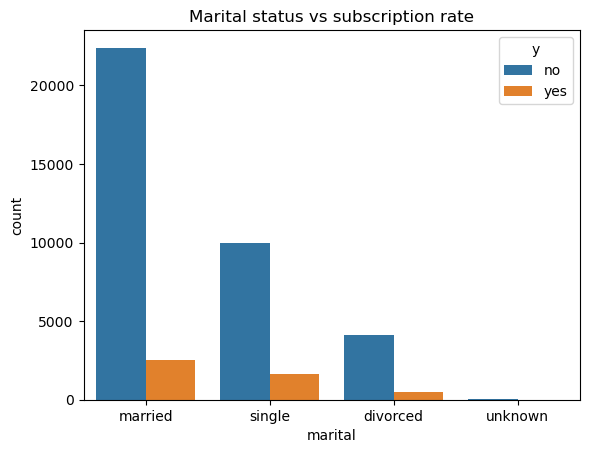

In [12]:
sns.countplot(x=df['marital'],hue=df.y)
plt.title('Marital status vs subscription rate')
plt.savefig("visulaization/marital_vs_subscription.png")
plt.show()

##### Observation
- Customers who are married are in largest, single are in moderate and diverced are less group in the dataset.
- subscription are  also in the same order
##### Business Insights
- Single customers have highere subscription rate compare to married and divorced customers
- Although married customers form the majority, single customers are relatively more responsive to marketing campaigns and should be prioritized for targeting.

#### 3.1.4 Education Vs Subscription

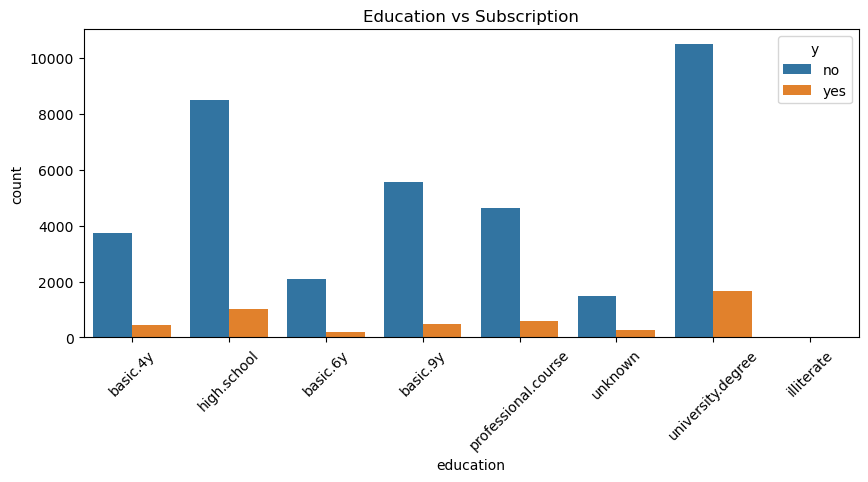

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['education'], hue = df.y)
plt.title('Education vs Subscription')
plt.xticks(rotation=45)
plt.savefig('visulaization/ecuation_vs_subscribe.png')
plt.show()

##### Observation
- Most customers are belongs to **High.school** and **university.degreee** education categories
- The number of subscription increses with the increation the level of education
- Customer with basic education show lower subscription rate
##### Business Insights
- Customer with **higher education(university.degree, professionl.course)** are more likely to subscribe to the term deposit
- Marketing compaign can be more effective when **targetting well-educated customers**, as they respond to better financial products
- For customers with lower education levels , simpler conversion and awareness-based compaigns may improve conversation

#### 3.1.5 default vs Subscription

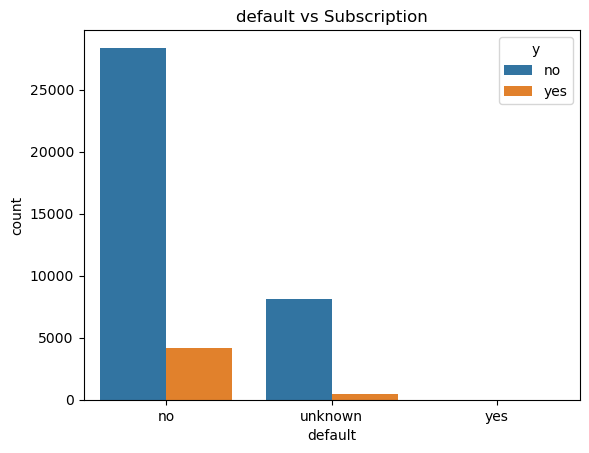

In [14]:
sns.countplot(x=df['default'],hue=df['y'])
plt.title('default vs Subscription')
plt.savefig('visulaization/default_vs_subscription.png')
plt.show()

##### Observation
- Customers who has no credit default largest group in dataset and has the high subscription rate.
- Customer who has credit deafault very small and almost never subscribe
- Customers with default is unknown shows lower subscription
##### Business insights
- Customers with no default history are the primary potential buyers
- Customers with default history are extremely unlikely to subscribe to the term deposit, and should avoid targetting in marketing compaign.

#### 3.1.6 Housing vs Subscription

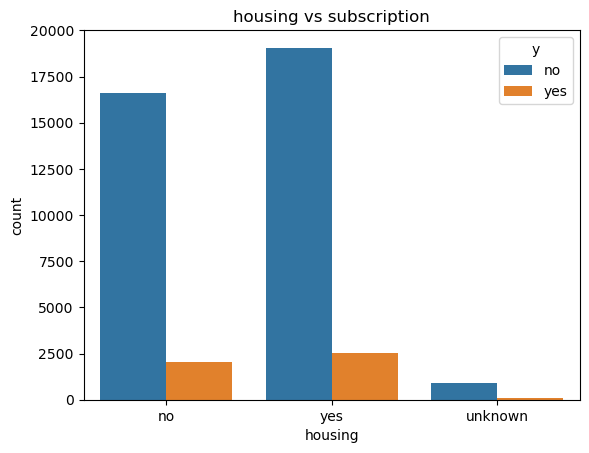

In [15]:
sns.countplot(x=df['housing'],hue=df['y'])
plt.title('housing vs subscription')
plt.savefig("visulaization/housing_vs_subscription.png")
plt.show()

##### Observation
- Most of the customers have house loans, followed by without housing loan, while few fall under the unknown category.
- Customer with house loan shows slightly higher subscription, mainly due to their larger presence in the dataset.
##### Business insights
- Customers without housing loans are slighlty more likely to subscribe compared to those with loans.
- Customer with house loans already have financial commitments, which may reduce their willingness to invest.
- Customer with unknown housing status contribute very little and are not a priority segment

#### 3.1.7 loan vs Subscription

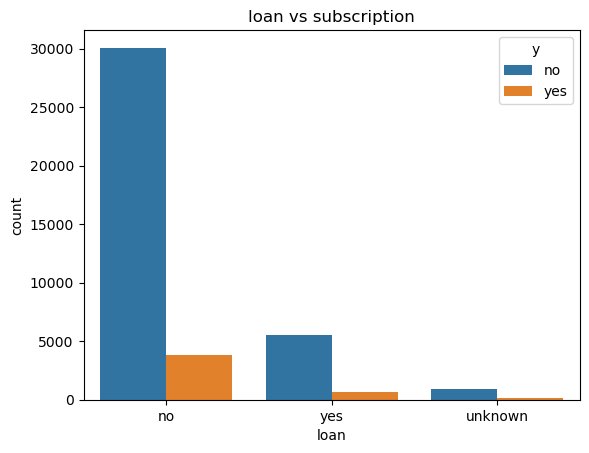

In [16]:
sns.countplot(x=df['loan'],hue=df['y'])
plt.title('loan vs subscription')
plt.savefig('visulaization/loan_vs_subscription.png')
plt.show()

##### Observation
- Most of the customers do not have a personal loan.
- A smaller number have a personal loan, and very few fall under the unknown category.
##### Busniess category
- Customer without personal loan are more likely to subscribe to the term deposit.
- Customers with personal loans may have higher financial obligations, which can reduce their interest in new investments.

### 3.2 Last contacts analysis

#### 3.2.1 contact vs subscription

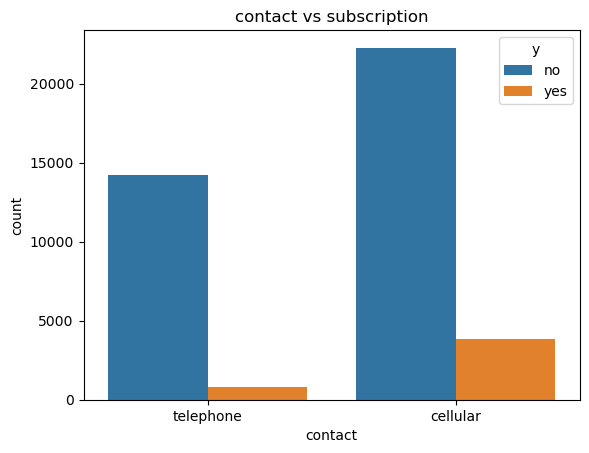

In [17]:
sns.countplot(x=df['contact'],hue=df['y'])
plt.title('contact vs subscription')
plt.savefig("visulaization/contact_vs_subscription.png")
plt.show()

##### Observation
- Most customer contacts were made via cellular rather than telephone
- The number of successful subscriptions is significantly higher for cellular contancts compared telephone.
##### Business insights
- Cellular contacts are more effictive for marking term deposit than telephone calls.
- The bank shoul prioratized cellular-based compaigns to improve subscription conversioin rate.

### 3.2.2 month vs Subscription

- **Since the dataset does not contain a full date, month is treated as a categorical feature rather than a datetime variable.**

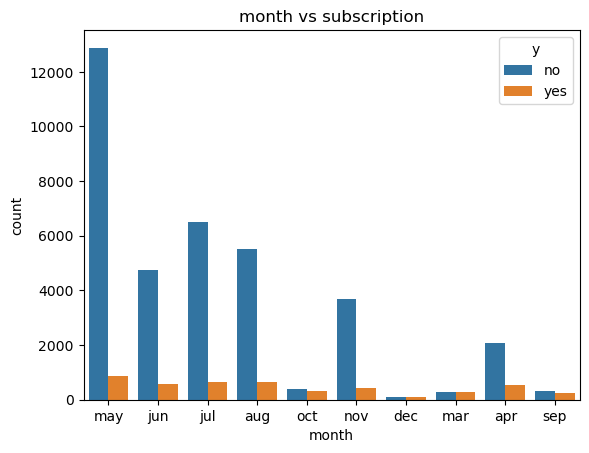

In [18]:
sns.countplot(x=df['month'],hue=df['y'])
plt.title('month vs subscription')
plt.savefig("visulaization/month_vs_subscription")
plt.show()

##### Observation
- Most Customer contacts occured during **may,june,jul and aug**
- Subscriptions are higher in **march, april, september, and october** compared to other months
##### Business insights
- Timing of campaigns strongly impacts subscription success, not just the number of calls.
- The bank can optimize campaign scheduling by focusing more on high-conversion months like March, April, September, and October.

#### 3.2.3 day_of_week vs subscription

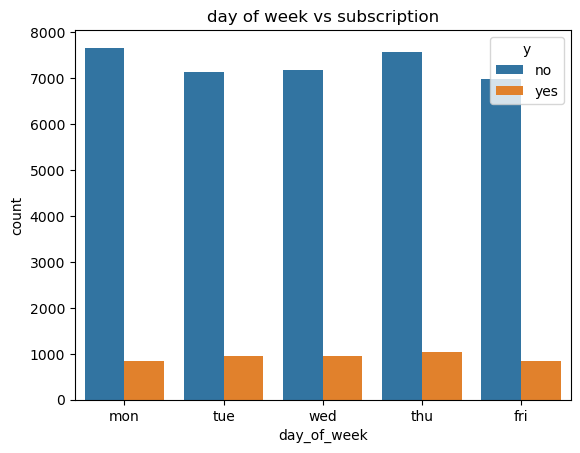

In [19]:
sns.countplot(x=df['day_of_week'],hue=df['y'])
plt.title('day of week vs subscription')
plt.savefig("visulaization/day_of_week_vs_subscription.png")
plt.show()

##### Observation
- Customer contacts are fairly evenly distributed across all weekdays.
- Thursday shows a slightly higher number of successful subscriptions compared to other days.
##### Business insights
- Day of the week has a minor impact on subscription outcome.
- Campaigns can be run on any weekday, but Thursday may be slightly more effective for better conversions.

### 3.2.4 Duration vs Subscription

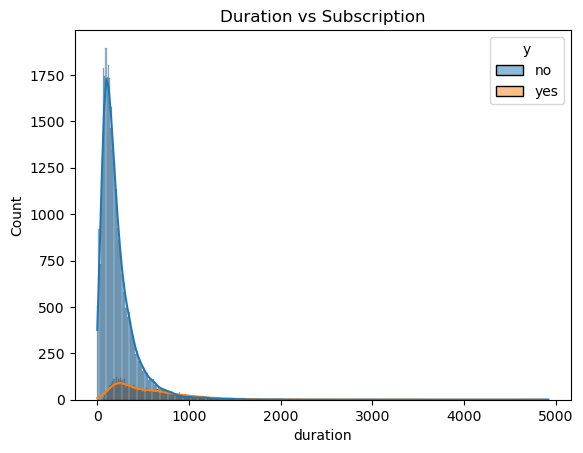

In [20]:
sns.histplot(x=df.duration, hue = df.y, kde=True)
plt.title('Duration vs Subscription')
plt.savefig("visulaization/Duration_vs_subscription.png")
plt.show()

##### Observation
- Most calls are short, customer who didn't subscribe mostly have short call duration.
- very few calls are very long, customers who subscribed generally have longer duration.
- **Duration = 0** almost always leads to **y = 0**, this is the redflag for data leakage.
##### Business insights
- Customer who stay longer on the call are more likely to subscribe to the term deposit.
- Very short calls almost always result in no suscription rate, indicating low subscription rate.
- This suggests that engaging conversion and customer interest during call plays key role in successful conversations.

### 3.3 Other attribute analysis

### 3.3.1 Campaign vs Subsciption rate

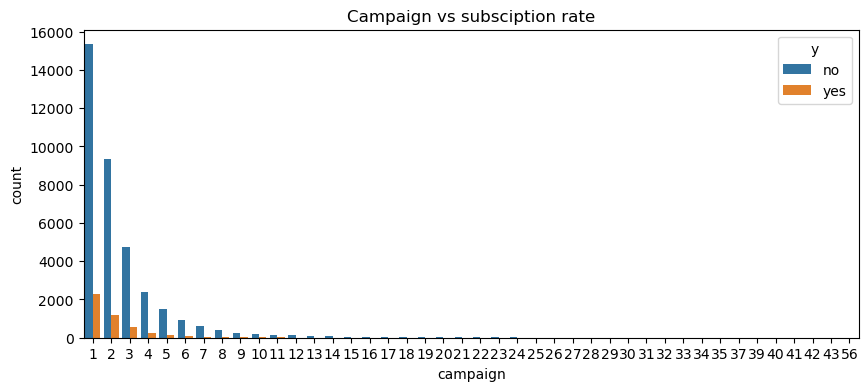

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['campaign'], hue = df.y)
plt.title('Campaign vs subsciption rate')
plt.savefig("visulaization/campaign_vs_subscription.png")
plt.show()

##### Observation
- Most customers were cantacted 1 to 3 times during the compaign
- As the number of contacts increases, the number of subscription deacreases sharply.
##### Business insights
- **Early conatact attempts are the most affective in converting customers.**
- Reated followup calls leads to lower success rate, possibly due to customer irritation or lack of interest.
- Optimizing compaigns by limiting the number of calls per customer can reduce cost and improve overall conversion efficiency

#### 3.3.2 pdays vs Subscription

pdays(Given):  
Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

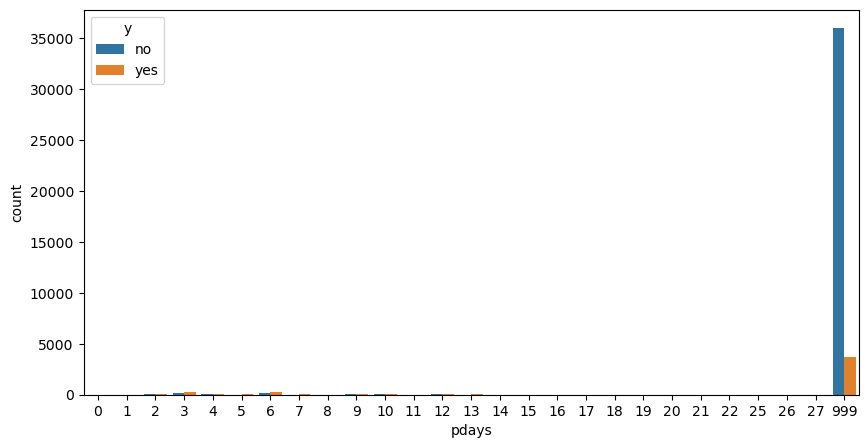

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['pdays'],hue=df.y)
plt.savefig("visulaization/pdays_vs_subscription")
plt.show()

##### Insights 
- **Most of the values are pdasy = 999, which means, customers were not contacred earlier.**
- Very few customers were contacted earlier
- This feature is higly skewed, not hard to interpret
##### Business Insights
- **Previously contacted customers have a higher subscription probability.**
- This feature helps the bank focus on warm leads, improving campaign efficiency.
- Simplfying pdays into binary variable can also imporve model performance

#### 3.3.4 Previous vs Subscription

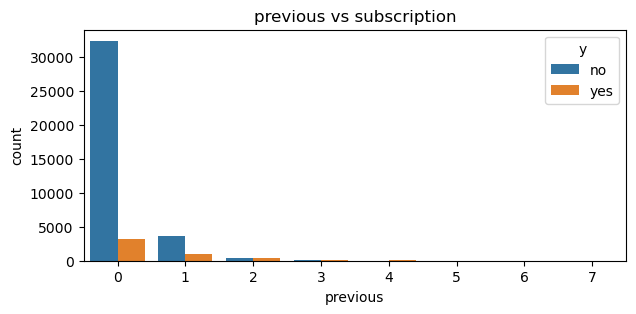

In [23]:
plt.figure(figsize=(7,3))
sns.countplot(x=df['previous'],hue=df['y'])
plt.title('previous vs subscription')
plt.savefig("visulaization/previous_vs_subscription.png")
plt.show()

##### Observation
- Most customers were contacted 0 times before this campaign.
- As number of previous contacts increases, number of customers decreases.
- Customer with atleast 1 previous contact show a higher proportion of subscription
##### Business insights
- First time contacted customers rarely subscribe compared to repeat contacts
- Follow-up campaigns are more effective, as prior interaction increases the chance of subcription

#### 3.3.5 Poutcome vs Subscription

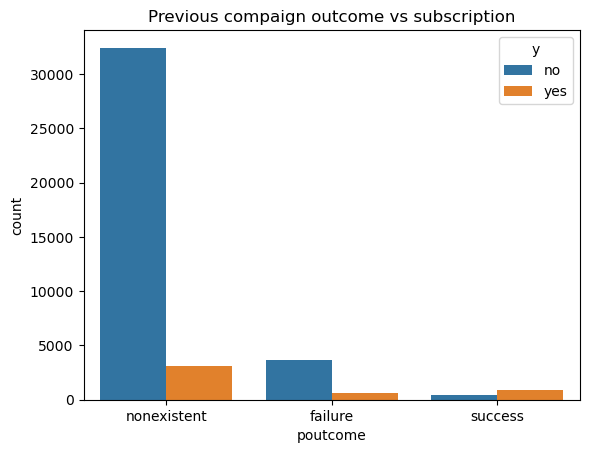

In [24]:
sns.countplot(x = df.poutcome, hue=df.y)
plt.title('Previous compaign outcome vs subscription')
plt.savefig("visulaization/previous_compaign_outcome_vs_subscription.png")
plt.show()

##### Observation
- Customers with a successful outcome in previous campaigns have a much higher likelihood of subscribing again. Customers with no previous contact form the majority but show a lower subscription rate, while customers with previous failures are least likely to subscribe.
##### Business insights
- Previous campaign success is a strong indicator of customer interest and can be used to prioritize customers in future marketing campaigns.

### 3.3.6 emp.var.rate vs subscription

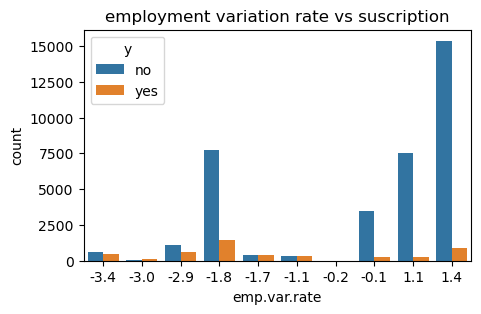

In [25]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['emp.var.rate'],hue=df['y'])
plt.title('employment variation rate vs suscription')
plt.savefig("visulaization/emp.var.rate_vs_subscription.png")
plt.show()

##### Observation
- Most customers belong to a few specific employment variation values (like -1.8, -0.1, 1.1, 1.4).
- When emp.var.rate is negative, the number of subscriptions is generally lower.
- When emp.var.rate is positive (1.1, 1.4), subscriptions increase in absolute count.
##### Business insights
- Customers are more likely to subscribe during strong economic periods (positive employment growth).
- In weak job markets, customers are less willing to commit to financial products.
- Banks should intensify campaigns when employment indicators are positive to maximize conversions.

#### 3.3.7 cons.price.idx vs subscription

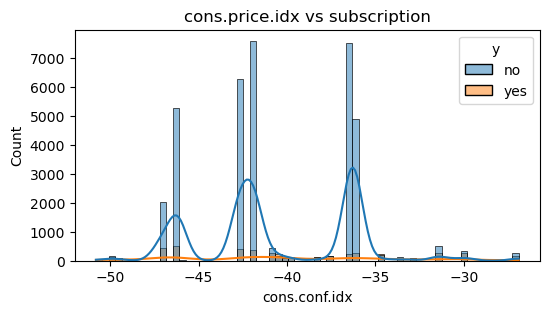

In [26]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['cons.conf.idx'],hue=df['y'],kde=True)
plt.title('cons.price.idx vs subscription')
plt.savefig("visulaization/con.price.idx_vs_subscription.png")
plt.show()

##### Observation
- Most data points lie between -50 and -30.
- Subscriptions (yes) are slightly higher when index is less negative (around -35 to -30).
- When confidence is very low (around -48), subscriptions are fewer.
##### Business insights
- Customers are more likely to subscribe when consumer confidence is high, as people feel financially secure and are more willing to commit to long-term financial products.

#### 3.3.8. euribor3m VS Subscription rate

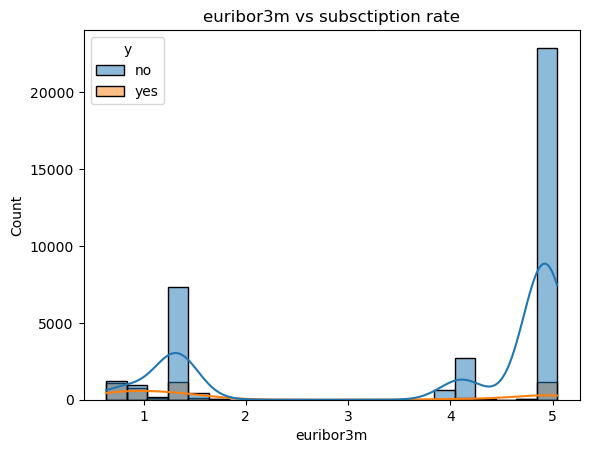

In [27]:
sns.histplot(x=df['euribor3m'], hue=df.y,kde = True)
plt.title("euribor3m vs subsctiption rate")
plt.savefig("visulaization/euribor3m_vs_subsciption")
plt.show()

##### Observation
- Higher euroibor3m values are associated with large number of non-subscriptions
- Subscriptions are more frequent when euroibor3m values are lower
##### Business insights
- When interest rates are low, customers are more likely to subscribe to term deposits.
- When interest rates are high, customers prefer other investment options, so subscriptions decrease.  
- Bank marketing campaigns work better during low-interest periods, as customers are more open to fixed deposit offers.  

### 3.3.9 nr.employed vs subscription

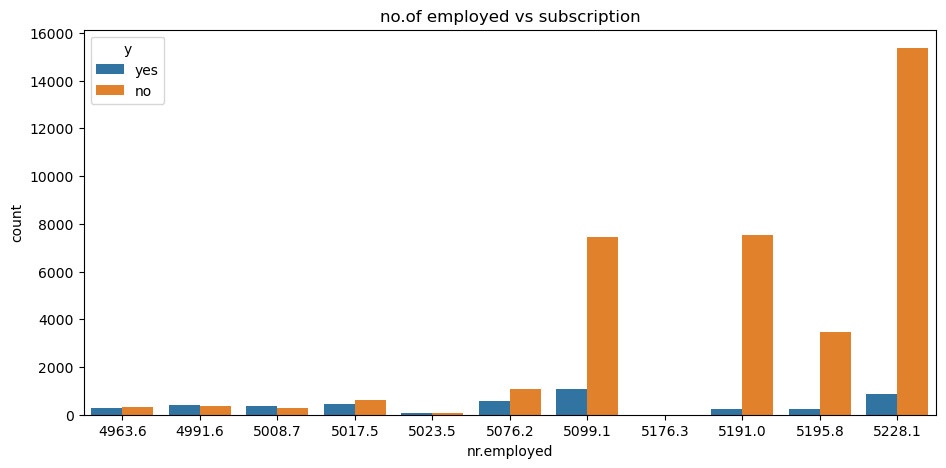

In [28]:
plt.figure(figsize=(11,5))
sns.countplot(x=df['nr.employed'],hue=df['y'])
plt.title('no.of employed vs subscription')
plt.savefig('visulaization/nr.employed_vs_subscription.png')
plt.show()

##### Observation
- The number of employed (nr.employed) takes discrete values, indicating different economic periods.
- Most customers did not subscribe when employment levels were very high.
- Higher subscription counts are observed at lower employment levels.
##### Business Insight
- Macroeconomic conditions influence customer decisions on term deposits.
- During periods of lower employment or economic uncertainty, customers are more likely to opt for safer investments like term deposits.

### 3.4 Feature Correlation

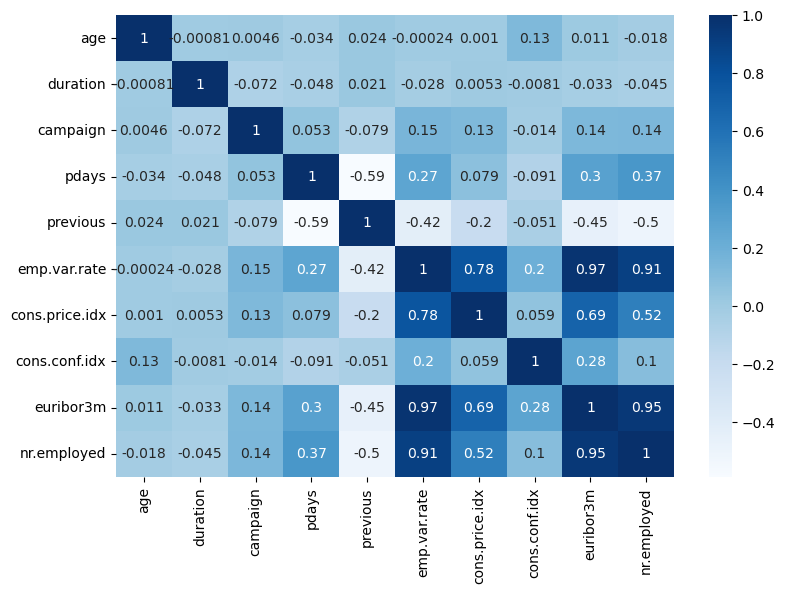

In [29]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)
plt.savefig('visulaization/feature_correlation.png')
plt.show()

##### Observation
- Strong positive correlations are observed among economic variables such as emp.var.rate, euribor3m, and nr.employed, indicating they move together. Most customer-related features like age, campaign count, and previous contacts show weak correlation with each other.
##### Insights
- The presence of high correlation among economic indicators suggests potential multicollinearity, which should be considered when using linear models, while tree-based models can handle this effectively.

### **Final Exploratory Data Analysis Summary**
•	The dataset contains 41,188 customer records and 21 features, including demographic, financial, campaign interaction, and macroeconomic indicators.
•	The target variable y (term deposit subscription) is highly imbalanced, with ~11% positive and ~89% negative outcomes.
•	No missing values were found; however, several categorical variables contain ‘unknown’ values, which are treated as valid categories.
•	Duplicate records (12 rows) were identified and removed to maintain data quality.
•	Customer demographics such as age, job, marital status, and education show noticeable differences in subscription behavior.
•	Campaign interaction variables (contact type, month, duration, number of calls) strongly influence subscription outcomes.
•	Previous campaign history (pdays, previous contacts, poutcome) is a strong predictor of customer response.
•	Macroeconomic indicators (employment rate, Euribor rate, consumer confidence) significantly impact customer willingness to subscribe.
•	High correlation exists among economic variables (emp.var.rate, euribor3m, nr.employed), indicating potential multicollinearity for linear models.

### Final Business Insights
#### Key Business Insights
##### Customer Profile
- Customers aged 30–40 years show the highest subscription rates, making them a high-value target segment.
- Customers with higher education levels (university degree, professional courses) are more likely to subscribe.
- Single customers show a higher response rate compared to married and divorced customers.
- Customers without credit default history and without personal loans are significantly more likely to subscribe.
##### Campaign Strategy
- Cellular contact is far more effective than telephone calls and should be prioritized.
- Subscription success depends more on timing than call volume:
- Higher conversion months: March, April, September, October
- Early contact attempts (1–3 calls) are most effective.
- Repeated calls reduce success and increase campaign cost.
- Call duration is strongly associated with subscription, but it causes data leakage and should be excluded from predictive models.
##### Previous Campaign Impact
- Customers who subscribed in previous campaigns have a very high probability of subscribing again.
- Previously contacted customers perform better than first-time contacts.
- Simplifying pdays into a binary feature (previously contacted or not) improves interpretability and model performance.
##### Economic Conditions
- Customers are more likely to subscribe during:
- - Low interest rate periods
  - Higher consumer confidence
  - Economic uncertainty, where safer investments like term deposits are preferred
  - Marketing campaigns should be aligned with favorable economic indicators to maximize conversions.



### 4. Data Preprocessing

### 4.1 Handle Unknown values 

Several categorical variables contain missing values encoded as "unknown". Since these values represent unavailable customer information rather than data errors, they were retained as a separate category and encoded accordingly to preserve their predictive information.

### 4.2 Feature Engineering

#### Feature engineering decision after Observing EDA

##### pdays
- A binary feature prevously contacted will be created, value 0 means customer was not contacted(pdays equal 999) and value 1 means customer prevously contacted(pdays not equal to 999).

In [30]:
df['previously_contacted'] = np.where(df['pdays']==999,0,1).astype('int')

In [31]:
df.drop(columns='pdays',inplace=True)

The pdays variable contains a special value (999) indicating that the client was not contacted in a previous campaign. Since most observations fall under this category and the exact number of days is less informative, a binary feature previously_contacted was created to represent whether the client had prior contact history. After feature creation, the original pdays column was removed to avoid distortion caused by the placeholder value.

##### Compaign
- Campaign has very large values, so they will be treated as outliers.
- Limit (cap) high values to avoid model bias.
- A new feature will be created:
- - 0 - Low contact (1–3 calls)
- - 1 - High contact (>3 calls)
- This makes the data cleaner and easier for the model to learn.

In [32]:
df['campaign'] = np.where(df['campaign']<=3,0,1).astype(int)

##### Drop data leakage column

In [33]:
df.drop(columns='duration',inplace=True)

The duration variable was removed from the dataset to prevent data leakage, as call duration is only known after the call is completed and would not be available at prediction time.

#### Target and Predictor seperator

In [34]:
X = df.drop(columns='y')
y = df.y

#### Train Test Split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

#### Creating Column Transformer

In [36]:
cat_col = X.select_dtypes(include=['object','category']).columns
num_col_std = ['emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed']
# these num_col_enc has no outliers and it needs scaling. we use standard scaler. Robust scaler will be applied to age column which has outliers

In [37]:
preprocessor = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),cat_col),
    ('rs',RobustScaler(),['age']),
    ('ssc',StandardScaler(),num_col_std)
])

In [38]:
### Target variable Encoding
y_train = y_train.map({'yes':1,'no':0})
y_test = y_test.map({'yes':1,'no':0})

## Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

### 5. Model Creation and Evaluation

#### 5.1 Logistic Regression

In [39]:
# Creating pipeline for logistic regression
pipeline_lr = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
])

In [40]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [41]:
scoring = ["precision", "recall", "f1", "roc_auc"]

In [42]:
cv_results_lr = cross_validate(
    pipeline_lr,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

print("Logistic Regression CV result")
print('Precision:',cv_results_lr['test_precision'].mean())
print("Recall:",cv_results_lr['test_recall'].mean())
print("f1:",cv_results_lr['test_f1'].mean())
print("ROC-AUC:",cv_results_lr['test_roc_auc'].mean())

Logistic Regression CV result
Precision: 0.3510786515449689
Recall: 0.6235491723289789
f1: 0.4491720935140557
ROC-AUC: 0.7890128331156884


In [43]:
# fit model
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('rs', RobustScaler(),
                                                  ['age']),
                                                 ('ssc', StandardScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [44]:
y_prob_lr = pipeline_lr.predict_proba(X_test)[:,1]

In [45]:
# threshold tuning
for t in [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9]:
    y_predlr = (y_prob_lr >= t)
    print(t,'f1:', f1_score(y_test, y_predlr),'precision:',precision_score(y_test,y_predlr),'recall:',recall_score(y_test,y_predlr))

0.1 f1: 0.20253164556962025 precision: 0.11267605633802817 recall: 1.0
0.2 f1: 0.2176969696969697 precision: 0.12264408631521442 recall: 0.9676724137931034
0.3 f1: 0.27528568991983626 precision: 0.1635258358662614 recall: 0.8696120689655172
0.4 f1: 0.3953147877013177 precision: 0.27141133896260555 recall: 0.7273706896551724
0.5 f1: 0.46000765403750477 precision: 0.3566765578635015 recall: 0.6476293103448276
0.6 f1: 0.4946512623020967 precision: 0.41022001419446413 recall: 0.6228448275862069
0.7 f1: 0.49202264539372104 precision: 0.470935960591133 recall: 0.5150862068965517
0.8 f1: 0.44017358958462494 precision: 0.5182481751824818 recall: 0.38254310344827586
0.9 f1: 0.3007518796992481 precision: 0.6691449814126395 recall: 0.1939655172413793


In [46]:
#choose t = 0.6
y_pred_lr = (y_prob_lr>=0.6)

In [47]:
print(classification_report(y_test,y_pred_lr))
print('ROC-AUC : ',roc_auc_score(y_test,y_prob_lr))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7308
           1       0.41      0.62      0.49       928

    accuracy                           0.86      8236
   macro avg       0.68      0.75      0.71      8236
weighted avg       0.89      0.86      0.87      8236

ROC-AUC :  0.8006057809816356


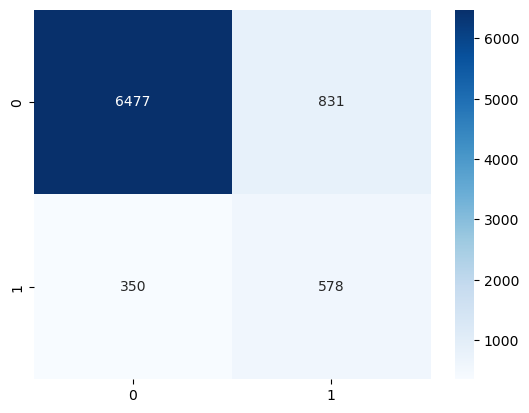

In [48]:
# Confutsion matrics
sns.heatmap(confusion_matrix(y_test,y_pred_lr),cmap='Blues',annot=True, fmt='d')
plt.show()

#### 5.2 Random Forest Classfier

In [49]:
pipeline_rfc = Pipeline([
    ('preproecossor',preprocessor),
    ('model',RandomForestClassifier(n_estimators=200,class_weight = 'balanced',random_state=42))
])

In [50]:
cv_results_rfc = cross_validate(
    pipeline_rfc,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)
print('Random forest Classifier CV result')
print("precision:",cv_results_rfc['test_precision'].mean())
print("recall:",cv_results_rfc['test_recall'].mean())
print("f1:",cv_results_rfc['test_f1'].mean())
print("ROC-AUC:",cv_results_rfc['test_roc_auc'].mean())

Random forest Classifier CV result
precision: 0.43628061998986284
recall: 0.2770134915999463
f1: 0.3387078920404659
ROC-AUC: 0.7539916626679083


In [51]:
# fit model
pipeline_rfc.fit(X_train,y_train)

Pipeline(steps=[('preproecossor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('rs', RobustScaler(),
                                                  ['age']),
                                                 ('ssc', StandardScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [52]:
y_prob_rfc = pipeline_rfc.predict_proba(X_test)[:,1]

In [53]:
#Threshold tuning
for t in [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9]:
    y_pred_rfc = (y_prob_rfc >= t)
    print(t,'f1:', f1_score(y_test, y_pred_rfc),'precision:',precision_score(y_test,y_pred_rfc),'recall:',recall_score(y_test,y_pred_rfc))

0.1 f1: 0.3790175864160097 precision: 0.26371308016877637 recall: 0.6734913793103449
0.2 f1: 0.4371184371184371 precision: 0.3512099411379987 recall: 0.5786637931034483
0.3 f1: 0.4206426484907498 precision: 0.3836589698046181 recall: 0.46551724137931033
0.4 f1: 0.40292628024760835 precision: 0.4216725559481743 recall: 0.3857758620689655
0.5 f1: 0.3611650485436893 precision: 0.4521880064829822 recall: 0.30064655172413796
0.6 f1: 0.31407407407407406 precision: 0.5023696682464455 recall: 0.22844827586206898
0.7 f1: 0.2480349344978166 precision: 0.6543778801843319 recall: 0.15301724137931033
0.8 f1: 0.141747572815534 precision: 0.7156862745098039 recall: 0.07866379310344827
0.9 f1: 0.043933054393305436 precision: 0.75 recall: 0.022629310344827586


In [54]:
y_pred_rfc = (y_prob_rfc>=0.3)

In [55]:
print(classification_report(y_test,y_pred_rfc))
print('ROC-AUC',roc_auc_score(y_test,y_prob_rfc))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7308
           1       0.38      0.47      0.42       928

    accuracy                           0.86      8236
   macro avg       0.66      0.69      0.67      8236
weighted avg       0.87      0.86      0.86      8236

ROC-AUC 0.7643626552384728


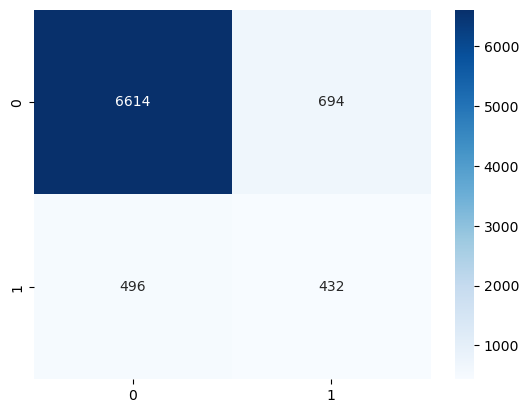

In [56]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred_rfc),cmap='Blues',annot=True, fmt='d')
plt.show()

#### 5.3 Gradient Boosting Classifier

In [57]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced',y=y_train)

In [58]:
pipeline_gb = Pipeline([
    ('prerprocessor',preprocessor),
    ('model',GradientBoostingClassifier(random_state=42)),
])

In [59]:
cv_results_gb = cross_validate(
    pipeline_gb,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)
print('Gradient Boosting Classifier CV result')
print('Precision:',cv_results_gb['test_precision'].mean())
print('Recall:',cv_results_gb['test_recall'].mean())
print("f1:",cv_results_gb['test_f1'].mean())
print("ROC-AUC:",cv_results_gb['test_roc_auc'].mean())

Gradient Boosting Classifier CV result
Precision: 0.6546410237189718
Recall: 0.24225384813515544
f1: 0.35349881639520886
ROC-AUC: 0.7928916169975943


In [60]:
#fit model
pipeline_gb.fit(X_train,y_train,model__sample_weight=sample_weights)

Pipeline(steps=[('prerprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('rs', RobustScaler(),
                                                  ['age']),
                                                 ('ssc', StandardScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [61]:
y_prob_gb = pipeline_gb.predict_proba(X_test)[:,1]

In [62]:
#hyperparameter tuning (RandomizedSearchCV)
param_dist = {
    "model__n_estimators": [50, 100, 150, 250],
    "model__learning_rate": [0.01, 0.1, 0.2],
    "model__max_depth": [2, 3, 4],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 5],
    "model__subsample": [0.6, 0.8, 1.0]
}


In [63]:
random = RandomizedSearchCV(
    estimator=pipeline_gb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [64]:
random.fit(X_train,y_train,model__sample_weight = sample_weights)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prerprocessor',
                                              ColumnTransformer(transformers=[('ohe',
                                                                               OneHotEncoder(drop='first'),
                                                                               Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                                              ('rs',
                                                                               RobustScaler(),
                                                                               ['age']),
                                                                              ('ssc',
                                                                               S...
                                                                                'nr.employed'])])),
                                             ('model',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.1,
                                                                 0.2],
                                        'model__max_depth': [2, 3, 4],
                                        'model__min_samples_leaf': [1, 2, 5],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 150,
                                                                250],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [65]:
gb_tuned = random.best_estimator_

In [66]:
y_prob_tuned_gb = gb_tuned.predict_proba(X_test)[:,1]

In [67]:
for t in [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9]:
    y_predgb = (y_prob_tuned_gb >= t)
    print(t,'f1:', f1_score(y_test, y_predgb),'precision:',precision_score(y_test,y_predgb),'recall:',recall_score(y_test,y_predgb))

0.1 f1: 0.20253164556962025 precision: 0.11267605633802817 recall: 1.0
0.2 f1: 0.20253164556962025 precision: 0.11267605633802817 recall: 1.0
0.3 f1: 0.20253164556962025 precision: 0.11267605633802817 recall: 1.0
0.4 f1: 0.37506775067750675 precision: 0.2505430847212165 recall: 0.7456896551724138
0.5 f1: 0.4810744810744811 precision: 0.3865271419228254 recall: 0.6368534482758621
0.6 f1: 0.5159447881960971 precision: 0.4620630861040068 recall: 0.584051724137931
0.7 f1: 0.4444444444444444 precision: 0.5323308270676692 recall: 0.38146551724137934
0.8 f1: 0.0 precision: 0.0 recall: 0.0
0.9 f1: 0.0 precision: 0.0 recall: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
y_pred_tuned_gb = (y_prob_gb >= 0.6)

In [69]:
print(classification_report(y_test,y_pred_tuned_gb))
print('roc_auc:',roc_auc_score(y_test,y_prob_gb))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7308
           1       0.43      0.62      0.51       928

    accuracy                           0.87      8236
   macro avg       0.69      0.76      0.72      8236
weighted avg       0.89      0.87      0.88      8236

roc_auc: 0.8038865355397015


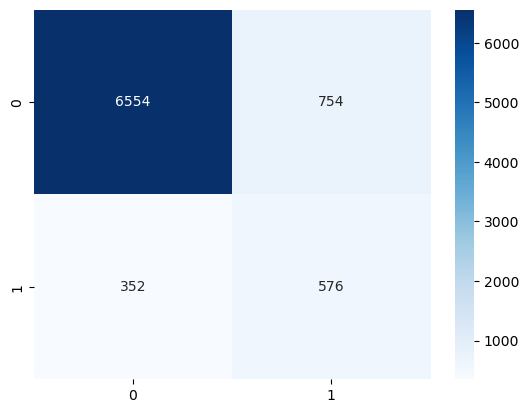

In [72]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred_tuned_gb),cmap='Blues',annot=True, fmt='d')
plt.show()

#### 5.4 XGBoost Classifier

In [73]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos


In [74]:
pipeline_xgb = Pipeline([
    ('preprocessor',preprocessor),
    ('model',XGBClassifier(
        objective='binary:logistic',
        random_state = 42,
        scale_pos_weight = scale_pos_weight
    ))
])

In [75]:
XGBClassifier().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'feature_weights', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [76]:
cv_results_xgb = cross_validate(
    pipeline_xgb,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)
print("XGB classifier CV result")
print("Precisioin:",cv_results_xgb['test_precision'].mean())
print("Recall:",cv_results_xgb['test_recall'].mean())
print("f1",cv_results_xgb['test_f1'].mean())
print("ROC-AUC:",cv_results_xgb['test_roc_auc'].mean())

XGB classifier CV result
Precisioin: 0.3447272111498191
Recall: 0.5486408636945724
f1 0.42337556909503
ROC-AUC: 0.753104609725251


In [77]:
#fit model
pipeline_xgb.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('rs', RobustScaler(),
                                                  ['age']),
                                                 ('ssc', StandardScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed'])])),
                ('mode...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [78]:
y_pred_xgb = pipeline_xgb.predict(X_test)
y_prob_xgb = pipeline_xgb.predict_proba(X_test)[:,1]

In [79]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7308
           1       0.36      0.59      0.45       928

    accuracy                           0.84      8236
   macro avg       0.65      0.73      0.68      8236
weighted avg       0.88      0.84      0.85      8236



In [80]:
# Hyperparameter Tuning (GridSearchCV)

In [81]:
param_grid_2 = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

In [82]:
grid_search = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_2,
    scoring=scoring,
    refit='f1',        \
    cv=cv,
    n_jobs=-1,
    verbose=3
)

In [83]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                                        ('rs',
                                                                         RobustScaler(),
                                                                         ['age']),
                                                                        ('ssc',
                                                                         Standard...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'roc_auc'],
             verbose=3)

In [84]:
model_gscv = grid_search.best_estimator_
y_prob_xgb_tuned = model_gscv.predict_proba(X_test)[:, 1]

In [85]:
for t in [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9]:
    y_predxgb = (y_prob_xgb_tuned >= t)
    print(t,'f1:', f1_score(y_test, y_predxgb),'precision:',precision_score(y_test,y_predxgb),'recall:',recall_score(y_test,y_predxgb))

0.1 f1: 0.20253164556962025 precision: 0.11267605633802817 recall: 1.0
0.2 f1: 0.2184483811850947 precision: 0.12319140140553948 recall: 0.9633620689655172
0.3 f1: 0.27548585066484826 precision: 0.16362899959497773 recall: 0.8706896551724138
0.4 f1: 0.4213896894012168 precision: 0.2997722095671982 recall: 0.709051724137931
0.5 f1: 0.47941296371789643 precision: 0.3855737704918033 recall: 0.6336206896551724
0.6 f1: 0.5205855443732845 precision: 0.4523052464228935 recall: 0.6131465517241379
0.7 f1: 0.5233830845771145 precision: 0.48613678373382624 recall: 0.5668103448275862
0.8 f1: 0.45859085290482077 precision: 0.5376811594202898 recall: 0.39978448275862066
0.9 f1: 0.2793103448275862 precision: 0.6982758620689655 recall: 0.17456896551724138


In [86]:
y_pred_xgb_tuned = (y_prob_xgb_tuned >= 0.7)

In [87]:
print(classification_report(y_test,y_pred_xgb_tuned))
print('roc_auc:',roc_auc_score(y_test,y_prob_xgb_tuned))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7308
           1       0.49      0.57      0.52       928

    accuracy                           0.88      8236
   macro avg       0.71      0.75      0.73      8236
weighted avg       0.89      0.88      0.89      8236

roc_auc: 0.8048148993545099


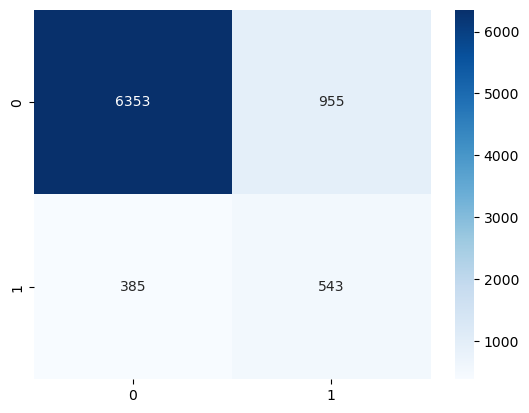

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),cmap='Blues',annot=True, fmt='d')
plt.show()

#### 5.5 Model Comparison

In [89]:
model_results = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Gradient Boosting(Tuned)','XGBoost(Tuned)'],
    'threshold':[0.6,0.3,0.6,0.7],
    'F1-score': [
        f1_score(y_test,y_pred_lr),
        f1_score(y_test,y_pred_rfc),
        f1_score(y_test,y_pred_tuned_gb),
        f1_score(y_test,y_pred_xgb_tuned)
    ],
    'Precision': [
        precision_score(y_test,y_pred_lr),
        precision_score(y_test,y_pred_rfc),
        precision_score(y_test,y_pred_tuned_gb),
        precision_score(y_test,y_pred_xgb_tuned)
    ],
    'Recall': [
        recall_score(y_test,y_pred_lr),
        recall_score(y_test,y_pred_rfc),
        recall_score(y_test,y_pred_tuned_gb),
        recall_score(y_test,y_pred_xgb_tuned)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test,y_prob_lr),
        roc_auc_score(y_test,y_prob_rfc),
        roc_auc_score(y_test,y_prob_tuned_gb),
        roc_auc_score(y_test,y_prob_xgb_tuned)
    ]
})

model_results

,Model,threshold,F1-score,Precision,Recall,ROC-AUC
0,Logistic Regression,0.6,0.494651,0.410220,0.622845,0.800606
1,Random Forest,0.3,0.420643,0.383659,0.465517,0.764363
2,Gradient Boosting(Tuned),0.6,0.510186,0.433083,0.620690,0.804822
3,XGBoost(Tuned),0.7,0.523383,0.486137,0.566810,0.804815


In [90]:
df.to_csv("Model Comparison Table", index=False)

#### Key Insights
- Best overall model: XGBoost (Tuned) – highest F1 and precision → best balance.
- Best recall: Logistic Regression & Gradient Boosting → finds more subscribers.
- Random Forest: weakest performance → affected by class imbalance.
- Threshold tuning: significantly improved performance over default 0.5.

#### Final Model Selection and Conclusion

In this project, multiple machine learning models were trained and evaluated to predict customer subscription to term deposits. Due to the highly imbalanced nature of the dataset (~11% positive class), model performance was assessed using F1-score, Precision, Recall, and ROC-AUC, as accuracy alone would be misleading.

Logistic Regression served as a strong baseline model, achieving a recall of 0.62 and ROC-AUC of 0.80, but its linear nature limited its ability to capture complex non-linear relationships in the data. Random Forest showed comparatively lower recall (0.46) and overall performance, making it less suitable for identifying minority class customers.

After hyperparameter tuning, Gradient Boosting improved model performance, achieving an F1-score of 0.51 and ROC-AUC of 0.80, indicating better handling of non-linear patterns. However, the tuned XGBoost model delivered the best overall performance, with the highest F1-score (0.52) and ROC-AUC (0.80) while maintaining a balanced trade-off between precision (0.49) and recall (0.57) through threshold optimization.

From a business perspective, recall is especially important in marketing campaigns, as failing to identify potential subscribers results in missed opportunities. The XGBoost model effectively minimizes false negatives while maintaining acceptable precision, making it the most suitable model for real-world deployment.

Therefore, the tuned XGBoost model is selected as the final model, as it provides the best balance between predictive performance and business impact for targeted bank marketing campaigns.

#### 5.7 ROC_Curve Comparison

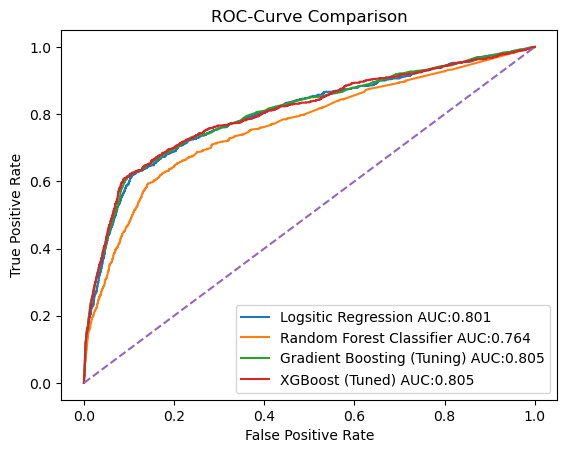

In [91]:
models = {
    'Logsitic Regression':y_prob_lr,
    'Random Forest Classifier':y_prob_rfc,
    'Gradient Boosting (Tuning)':y_prob_tuned_gb,
    'XGBoost (Tuned)':y_prob_xgb_tuned
}
for name,prob in models.items():
    fpr,tpr,_ = roc_curve(y_test,prob)
    plt.plot(fpr,tpr, label=f'{name} AUC:{roc_auc_score(y_test,prob):.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve Comparison')
plt.legend()
plt.savefig("visulaization/ROC-Curve_comparison.png")
plt.show()


- Boosting-based models outperform others in capturing customer behavior patterns.
- The closer the curve is to the top-left corner, the better the model — hence XGBoost and Gradient Boosting are preferred.

#### Key Observation
- Gradient Boosting (Tuned) and XGBoost (Tuned) have the highest ROC-AUC (~0.805) → best overall discrimination.
- Logistic Regression performs competitively with AUC = 0.801, showing strong baseline performance.
- Random Forest has the lowest AUC (0.764) → weakest at separating classes.

### 6. Feature Importance

In [92]:
xgb_model = pipeline_xgb.named_steps['model']

In [93]:
ohe = model_gscv.named_steps['preprocessor'].named_transformers_['ohe']
cat_features = ohe.get_feature_names_out(cat_col)

In [94]:
all_features = np.concatenate([
    cat_features,
    ['age'],
    num_col_std
])


In [95]:
fi_df = pd.DataFrame({
    'Feature':all_features,
    'Importance':xgb_model.feature_importances_
}).sort_values('Importance')

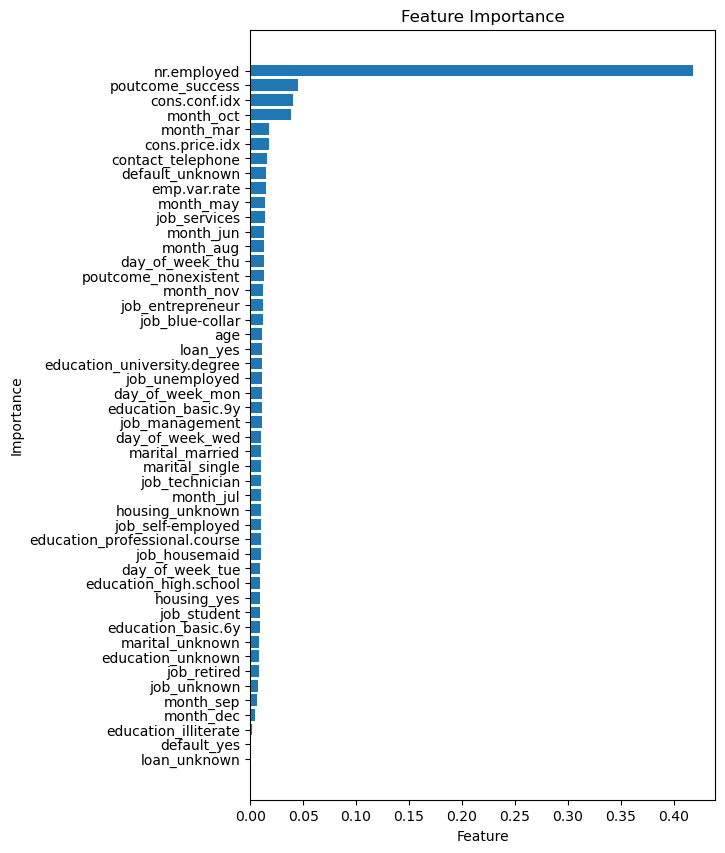

In [96]:
plt.figure(figsize=(6,10))
plt.barh(fi_df['Feature'],fi_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.savefig("visulaization/feature_importance.png")
plt.show()

#### Insights
- nr.employed dominates the model → overall employment level (macro-economic factor) has the strongest influence on whether customers subscribe.
- Previous campaign outcome matters → poutcome_success is highly important, meaning customers who responded positively before are much more likely to subscribe again.
- Economic indicators are key drivers → cons.conf.idx, cons.price.idx, and emp.var.rate show that customer decisions are strongly affected by the economic environment.
- Timing impacts success → certain months (Oct, Mar, May, Jun) contribute more, suggesting seasonal patterns in campaign effectiveness.
- Contact & customer profile features have lower impact → job, education, marital status, and age matter, but far less than economic and historical campaign features.
- Most features add marginal value → after the top few, importance drops sharply, indicating the model relies on a small core set of strong predictors.

### 7.Challenges Faced During the Project

1. **Class Imbalance**
The target variable was highly imbalanced, with significantly fewer customers subscribing to the product. This required careful evaluation using metrics such as precision, recall, F1-score, and ROC-AUC instead of relying only on accuracy.

2. **High Number of Categorical Variables**
The dataset contained many categorical features such as job, education, marital status, and month. These required appropriate encoding techniques to ensure the model could learn effectively.

3. **Feature Correlation and Redundancy**
Several macroeconomic variables were correlated with each other, which needed careful handling to avoid overfitting and misinterpretation.

4. **Handling Missing and Unknown Values**
Some features contained "unknown" values, which required preprocessing decisions to maintain data consistency without losing important information.

5. **Model Selection and Hyperparameter Tuning**
Multiple models were trained and evaluated. Hyperparameter tuning was time-consuming and required balancing model performance with computational cost.


####    **Technologies and Tools Used**

**Programming Language**: Python  
**Data Analysis & Manipulation:** Pandas, NumPy  
**Data Visualization:** Matplotlib, Seaborn  
**Machine Learning:** Scikit-learn  
**Model Evaluation:** ROC-AUC, Precision, Recall, F1-score   
**Model Optimization:** GridSearchCV / RandomizedSearchCV  
**Development Environment:** Jupyter Notebook

## Task 3: Suggestions to the Bank Marketing Team

Based on the feature importance analysis of the predictive model, the following actionable recommendations are proposed to improve term deposit subscription rates:

### 1. Align Marketing Campaigns with Economic Conditions
The feature `nr.employed` emerged as the most important predictor, indicating that overall employment and economic conditions strongly influence customer decisions.
- Increase campaign intensity during periods of economic stability or uncertainty, as customers prefer low-risk investments like term deposits.
- Use macroeconomic indicators to decide *when* to launch campaigns rather than running them uniformly.

### 2. Re-target Previously Successful Customers
The feature `poutcome_success` shows high importance, meaning customers who subscribed in previous campaigns are more likely to subscribe again.
- Prioritize customers with a successful previous campaign outcome.
- Use personalized offers for repeat prospects instead of generic marketing messages.

### 3. Optimize Campaign Timing
Month-based features such as `month_oct` and `month_mar` contribute significantly to model predictions.
- Focus marketing efforts during high-performing months (e.g., March and October).
- Reduce campaign spending during months with consistently low response rates.

### 4. Improve Contact Strategy
The importance of the `contact_telephone` feature indicates that the mode of communication affects customer response.
- Prefer cellular contact over landline calls where possible.
- Limit the number of calls to avoid customer fatigue and negative responses.

### 5. Consider Consumer Confidence and Economic Sentiment
Macroeconomic features such as `cons.conf.idx`, `cons.price.idx`, and `emp.var.rate` influence subscription behavior.
- Position term deposits as safe and stable investment options during periods of low consumer confidence.
- Tailor marketing messages according to prevailing economic sentiment.

### 6. Segment Customers by Demographics and Occupation
Features related to age and job categories (e.g., services, blue-collar, entrepreneur) affect customer behavior.
- Customize marketing strategies based on occupation and age groups.
- Avoid one-size-fits-all campaigns by using customer segmentation.

### 7. Use the Predictive Model for Cost-Effective Targeting
Low-importance features and repeated negative outcomes indicate diminishing returns.
- Use the trained model to rank customers by probability of subscription.
- Focus marketing resources on high-probability customers to reduce cost and improve conversion rates.

### Conclusion
The analysis demonstrates that economic conditions, previous campaign outcomes, and campaign timing are the key drivers of customer subscription. By adopting a data-driven, economically informed, and behavior-focused marketing strategy, the bank can significantly improve campaign efficiency and customer conversion rates.
